# Name: Rutik Bhoyar

# Task-2: From the given 'Iris' dataset,predict the optimum number of clusters and represent it visually.

Importing Dataset and Required Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [79]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
data.info()
data.iloc[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [81]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [82]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [83]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# frequency distribution of species


In [84]:
#making a cross tab and naming the column
iris_outcome=pd.crosstab(index=data['Species'],columns='count')
iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [85]:
iris_setosa=data.loc[data['Species']=='Iris-setosa']
iris_virginica=data.loc[data['Species']=='Iris-virginica']
iris_versicolor=data.loc[data['Species']=='Iris-versicolor']

# Plotting Distribution

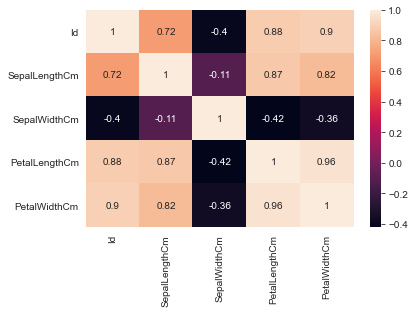

In [86]:
sns.heatmap(data.corr(),annot=True,linecolor='black')

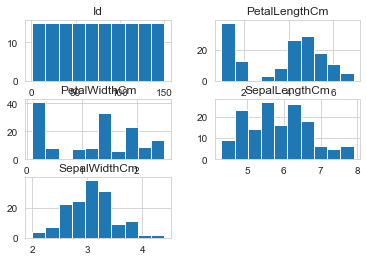

In [87]:
data.hist()
plt.show()

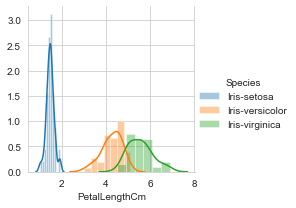

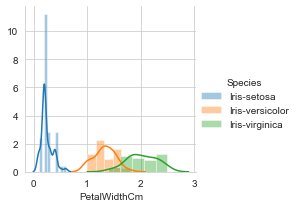

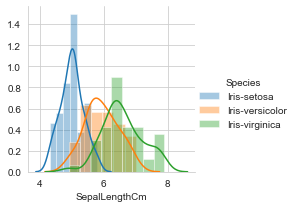

In [88]:
#histogram
sns.FacetGrid(data,hue='Species',height=3).map(sns.distplot,'PetalLengthCm').add_legend()
sns.FacetGrid(data,hue='Species',height=3).map(sns.distplot,'PetalWidthCm').add_legend()
sns.FacetGrid(data,hue='Species',height=3).map(sns.distplot,'SepalLengthCm').add_legend()
plt.show()

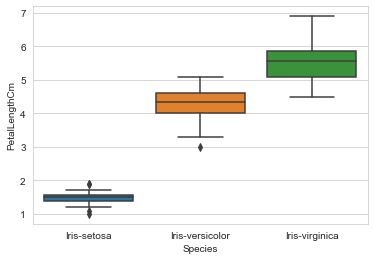

In [89]:
#box plot
sns.boxplot(x='Species',y='PetalLengthCm',data=data)
plt.show()

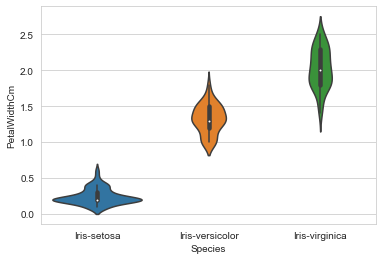

In [90]:
#violin plot
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.show()

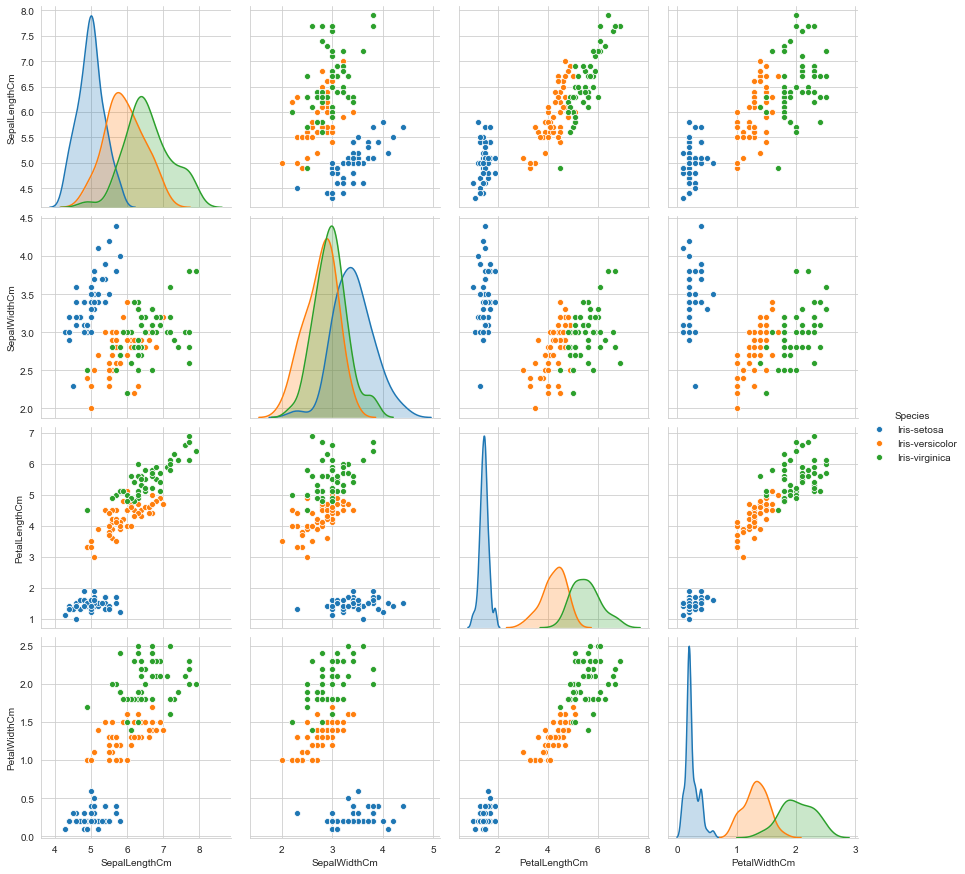

In [99]:
#scatter plot
data.drop(columns=['Id'],inplace=True)
sns.set_style('whitegrid')
sns.pairplot(data,hue='Species',height=3)
plt.show()

K-Means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

->Choose the number of clusters k

->Select k random points from the data as centroids

->Assign all the points to the closest cluster centroid

->Recompute the centroids of newly formed clusters

->Repeat steps 3 and 4

In [92]:
#finding optimum number of clusters for k-means classification
x=data.iloc[:,[0,1,2,3]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

Using the elbow method to determine the optimal number of clusters for k-means clustering

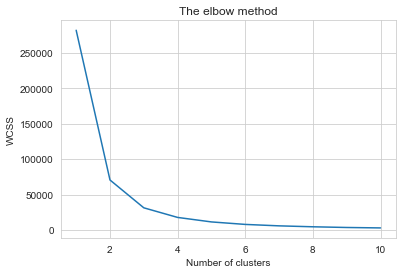

In [93]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Implementation of k-means clustering

In [94]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

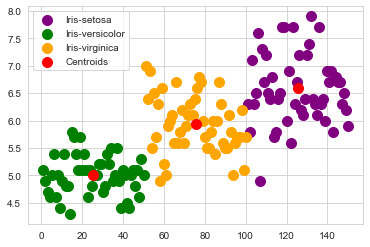

In [95]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='purple',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='green',label='Iris-versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='orange',label='Iris-virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroids')
plt.legend()

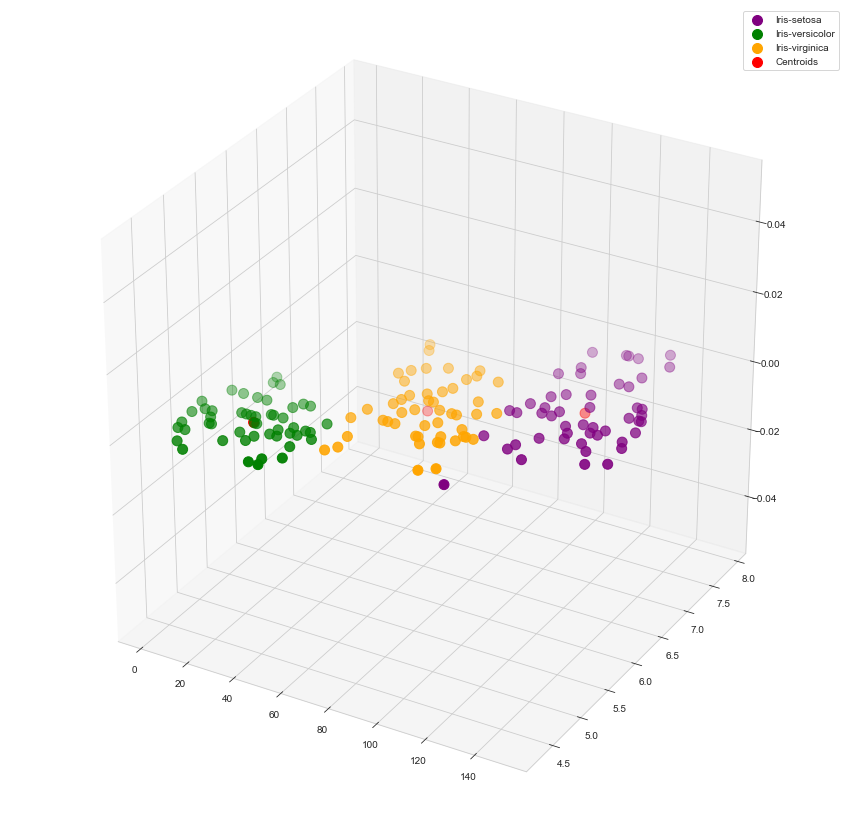

In [96]:
#3d scatter plot
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d') #gives 3d window

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='purple',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='green',label='Iris-versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='orange',label='Iris-virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroids')
plt.legend()